<a href="https://colab.research.google.com/github/satyakipal99/Coding-Samurai-Internship-Data-Science/blob/main/House_Price_Prediction_Linear_Regression_Coding_Samurai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices

Coding Samurai Data Science Internship: Project 2

Author: Satyaki Pal

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10,8)
sns.set_theme(style="darkgrid")

In [3]:
from sklearn import  linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Loading Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/HousingPrices-Amsterdam-August-2021.csv", index_col=0)
df

,Address,Zip,Price,Area,Room,Lon,Lat
1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


### Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB


In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Address    0
Zip        0
Price      0
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

### Exploratory Data Analysis for House Price Prediction


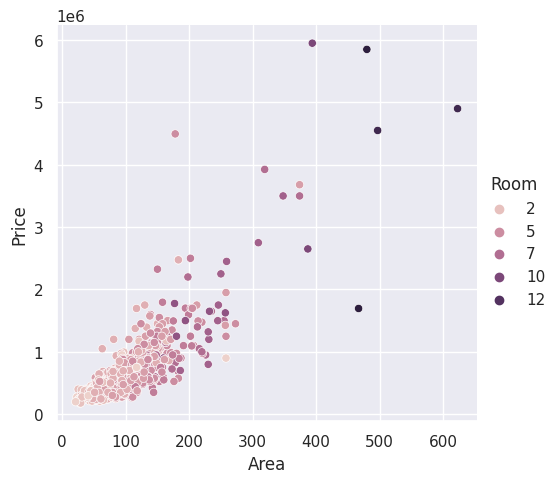

In [8]:
sns.relplot(x="Area", y="Price", hue="Room", data=df)
plt.show()

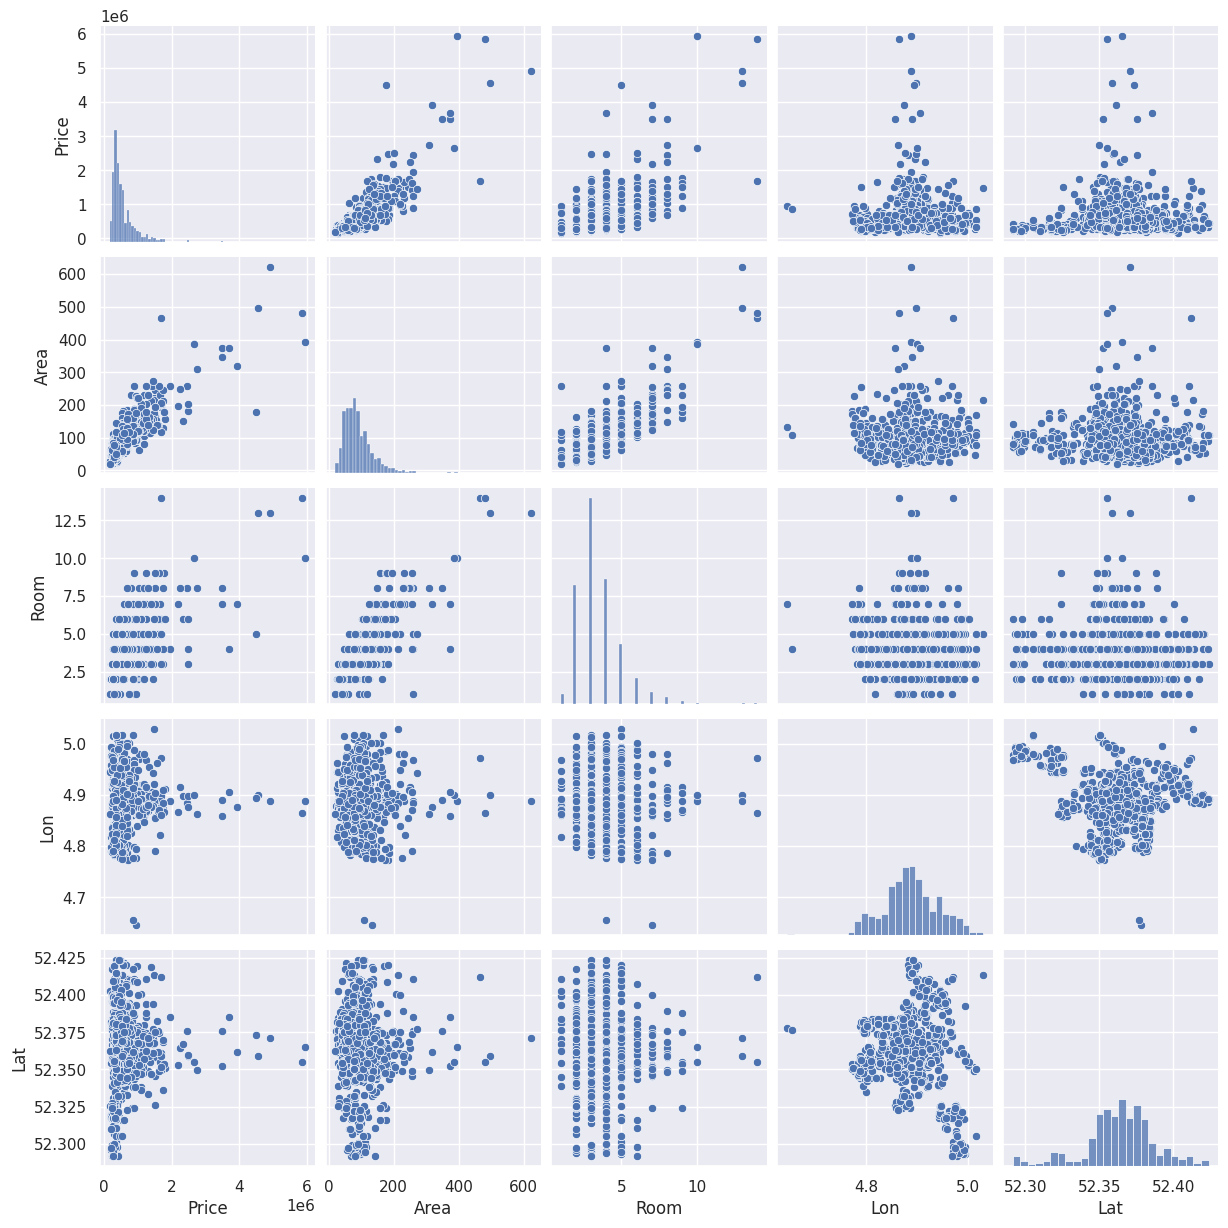

In [9]:
sns.pairplot(df)

<ipython-input-10-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

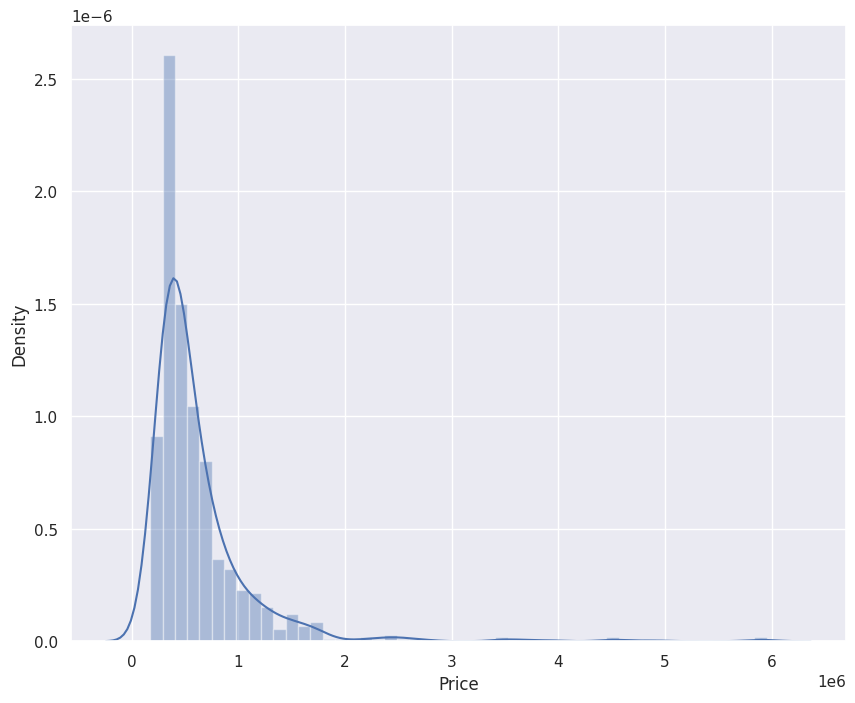

In [10]:
sns.distplot(df['Price'])

<ipython-input-11-1a3da36ed865>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


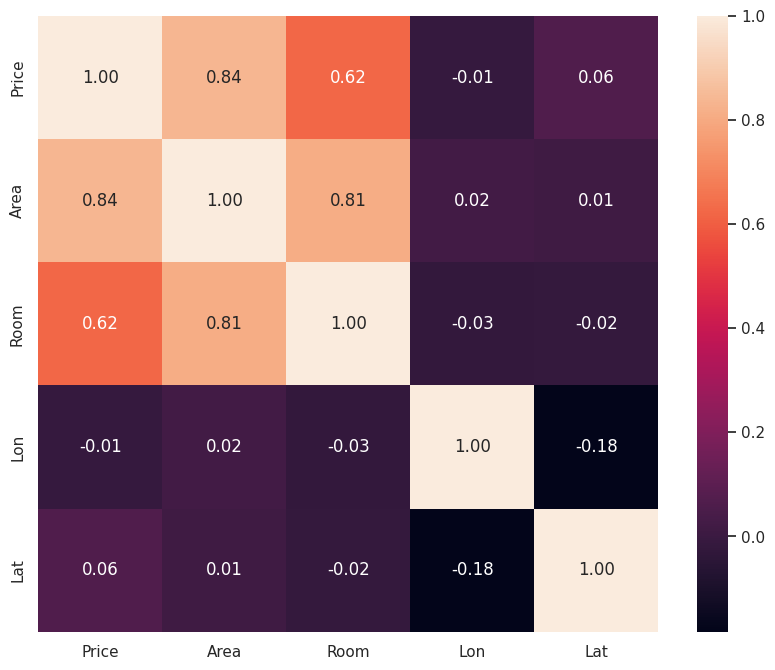

In [11]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

### Data Model

In [12]:
X = df[['Area', 'Room', 'Lat','Lon']]
y = df[['Price']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [14]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
print(regression.intercept_)

[-67065291.17878521]


### Predictions from our Linear Regression Model

In [16]:
predictions = regression.predict(X_test)

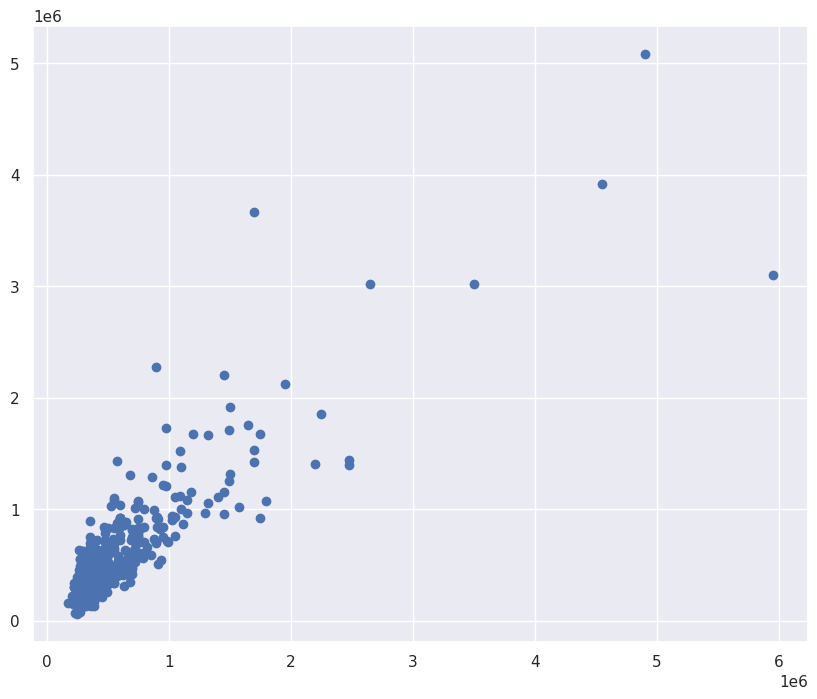

In [17]:
plt.scatter(y_test,predictions)

### Regression Evaluation Metrics

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 192150.40934479743
MSE: 92210102795.75111
RMSE: 303661.1644510228


In [19]:
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test, predictions))

Coefficient of determination: 0.73


Our Linear Regression Model for Predicting House Prices is 73% accurate.